# 0.2.0 Survival Curve Estimation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import lifelines

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../") 

import utils.paths as path
from utils.paths2 import direcciones

## 0.2.2 How to fit a Kaplan-Meier estimator?

- **Needed**

    - Verify that censorship is non-informative.
    - Ensure that survival rates of subjects are independet of when they entered the study.
    - Make sure that events and event duration are unambiguously defined.

- **Not needed**

    - Exclude censored subjects if they exceed 50% of the data.
    - Run a linear regression first and check the model performance.
    - Identify the underlying distribution of the time-to-event data.

## 0.2.3 Heart disease patient survival

In [4]:
echocardiogram = pd.read_csv(path.data_raw_dir("echocardiogram.csv"), sep=',')
echocardiogram.rename(columns={'alive':'observed'}, inplace=True)
echocardiogram = echocardiogram.dropna(subset=['survival','observed'])
print(echocardiogram.info())
echocardiogram.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 132
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   survival              130 non-null    float64
 1   observed              130 non-null    float64
 2   age                   125 non-null    float64
 3   pericardialeffusion   130 non-null    float64
 4   fractionalshortening  123 non-null    float64
 5   epss                  116 non-null    float64
 6   lvdd                  120 non-null    float64
 7   wallmotion-score      127 non-null    float64
 8   wallmotion-index      129 non-null    float64
 9   mult                  127 non-null    float64
 10  name                  130 non-null    object 
 11  group                 108 non-null    object 
 12  aliveat1              73 non-null     float64
dtypes: float64(11), object(2)
memory usage: 14.2+ KB
None


,survival,observed,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


In [5]:
has_pericardial_effusion = pd.read_csv(path.data_raw_dir("has_pericardial_effusion.csv"), sep=',')
none_pericardial_effusion = pd.read_csv(path.data_raw_dir("none_pericardial_effusion.csv"), sep=',')
has_pericardial_effusion.shape, none_pericardial_effusion.shape

((24, 5), (106, 5))

In [6]:
kmf_has_pe = lifelines.KaplanMeierFitter()
kmf_no_pe = lifelines.KaplanMeierFitter()
kmf_has_pe.fit(durations=has_pericardial_effusion['survival'], event_observed=has_pericardial_effusion['observed'])
kmf_no_pe.fit(durations=none_pericardial_effusion['survival'], event_observed=none_pericardial_effusion['observed'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 106 total observations, 30 right-censored observations>

In [7]:
print("The median survival duration (months) of patients with pericardial effusion: ", kmf_has_pe.median_survival_time_)
print("The median survival duration (months) of patients without pericardial effusion: ", kmf_no_pe.median_survival_time_)

The median survival duration (months) of patients with pericardial effusion:  27.0
The median survival duration (months) of patients without pericardial effusion:  31.0


## 0.2.6 Patient soreness treatment

In [8]:
recur = pd.read_csv(path.data_raw_dir("recur.csv"), sep=',')
print(recur.info())
recur.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     654 non-null    int64
 1   time_0  654 non-null    int64
 2   time_1  654 non-null    int64
 3   censor  654 non-null    int64
dtypes: int64(4)
memory usage: 20.6 KB
None


,age,time_0,time_1,censor
0,43,9,56,1
1,43,56,88,1
2,43,0,6,1
3,43,6,9,1
4,43,0,42,1


In [9]:
# Calculate duration
recur['duration'] = recur['time_1'] - recur['time_0']
recur.head()

,age,time_0,time_1,censor,duration
0,43,9,56,1,47
1,43,56,88,1,32
2,43,0,6,1,6
3,43,6,9,1,3
4,43,0,42,1,42


In [10]:
kmf = lifelines.KaplanMeierFitter()
kmf.fit(durations=recur['duration'], event_observed=recur['censor'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 654 total observations, 177 right-censored observations>

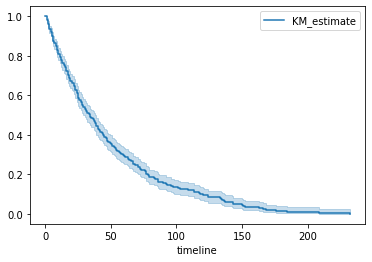

In [11]:
kmf.plot_survival_function()
plt.show()

In [12]:
kmf.median_survival_time_

34.0

In [13]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.983180
2.0,0.963147
3.0,0.936653
4.0,0.922603
5.0,0.902170
6.0,0.875311
7.0,0.862462
8.0,0.847926


**True:** 
- A: The confidence interval gets wider because there are fewer patients at risk.
    - R: A wide con,dence interval means we are less certain, o/en due to small sample size
- C: Soreness is more likely to occur to at-risk patients within the first 50 hours of treatment than after 50 hours. <br>
    - R: kmf = 34 < 50
**False:**
- B: The confidence interval gets wider because fewer patients experience soreness.
    - R: small sample size not for fewer patients experience
- D: Because the survival curve ends at 0, all patients have experienced soreness by the end of the study.
    - R: The curve will drop to zero if the last observation is not censored (true event duration is known).

## 0.2.8 Senators' terms in office

In [14]:
bc_df = pd.read_csv(path.data_raw_dir("bc_df.csv"), sep=',')
print(bc_df.info())
bc_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   name                                  44 non-null     object
 1   Political Affiliation at Appointment  44 non-null     object
 2   Province                              44 non-null     object
 3   Territory                             44 non-null     object
 4   Appointed on the advice of            44 non-null     object
 5   Term (yyyy.mm.dd)                     44 non-null     object
 6   start_date                            44 non-null     object
 7   end_date                              44 non-null     object
 8   reason                                39 non-null     object
 9   diff_days                             44 non-null     int64 
 10  observed                              44 non-null     bool  
dtypes: bool(1), int64(1), object(9)
me

,name,Political Affiliation at Appointment,Province,Territory,Appointed on the advice of,Term (yyyy.mm.dd),start_date,end_date,reason,diff_days,observed
0,"Austin, Jack",Liberal Party of Canada,British,Columbia,"Trudeau, Pierre Elliott",1975.08.19 - 2007.03.02 (Retirement),19/08/1975 0:00,2/03/2007 0:00,Retirement,11518,True
1,"Barnard, George Henry",Conservative (1867-1942),British,Columbia,"Borden, Robert Laird",1917.10.23 - 1945.11.08 (Resignation),23/10/1917 0:00,8/11/1945 0:00,Resignation,10243,True
2,"Bell (Heath), Ann Elizabeth Haddon",Liberal Party of Canada,British,Columbia,"Trudeau, Pierre Elliott",1970.10.07 - 1989.11.29 (Death),7/10/1970 0:00,29/11/1989 0:00,Death,6993,True
3,"Bostock, Hewitt",Liberal Party of Canada,British,Columbia,"Laurier, Wilfrid",1904.06.06 - 1930.04.28 (Death),6/06/1904 0:00,28/04/1930 0:00,Death,9457,True
4,"Campbell, Larry W.",Liberal Party of Canada,British,Columbia,"Martin, Paul Edgar Philippe",2005.08.02 -,2/08/2005 0:00,20:10.2,NaN,2982,False


In [15]:
kmf = lifelines.KaplanMeierFitter()
kmf.fit(durations=bc_df['diff_days'], event_observed=bc_df['observed'], label='British Columbia')

<lifelines.KaplanMeierFitter:"British Columbia", fitted with 44 total observations, 5 right-censored observations>

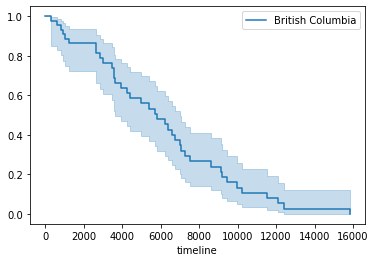

In [16]:
# Plot survival function on senator_fig
kmf.plot()

# Display the figure
plt.show()

## 0.2.9 Comparing patient soreness treatments

In [17]:
recur2 = pd.read_csv(path.data_raw_dir("recur2.csv"), sep=',')
print(recur2.info())
recur2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1296 non-null   object
 1   treat     1296 non-null   int64 
 2   duration  1296 non-null   int64 
 3   censor    1296 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 40.6+ KB
None


,age,treat,duration,censor
0,43,0,47,1
1,43,0,32,1
2,43,0,6,1
3,43,0,3,1
4,43,0,42,1


In [18]:
new = (recur2['treat'] == 0)

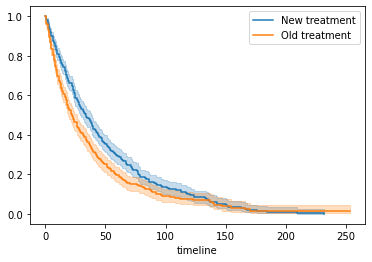

In [52]:
ax = plt.subplot(111)
# Mask for new treatment
new = (recur2['treat'] == 0)

# Fit to new treatment and plot survival function
kmf.fit(recur2[new]['duration'], recur2[new]['censor'], label='New treatment')
kmf.plot_survival_function(ax=ax)

# Fit to old treatment and plot survival function
kmf.fit(recur2[~new]['duration'], recur2[~new]['censor'],  label='Old treatment')
kmf.plot_survival_function(ax=ax)

# Display figure
plt.show()

The confidence intervals overlap, we need more formal hypothesis testing or regression-based methods to make a conclusion.

In [20]:
dolphin_df = pd.read_csv(path.data_raw_dir("dolphin_df.csv"), sep=',')
print(dolphin_df.info())
dolphin_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_date  271 non-null    object
 1   death_date  286 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB
None


,birth_date,death_date
0,26/12/1977,25/04/1991
1,5/03/1976,19/12/1989
2,4/03/1981,3/10/2003
3,26/02/1997,30/06/2019
4,6/05/1978,6/02/1992


In [21]:
# Create a function to return 1 if observed 0 otherwise
def check_observed(row):
    if pd.isna(row['birth_date']):
        flag = 0
    elif pd.isna(row['death_date']):
        flag = 0
    else:
        flag = 1
    return flag
  
# Create a censorship flag column
dolphin_df['observed'] = dolphin_df.apply(check_observed, axis=1)

# Print average of observed
print(np.average(dolphin_df['observed']))

0.8566666666666667


## 0.1.7 First look at censored data

Print the first row of the DataFrame to identify the correct column that indicates censorship. <br>
Count the number of censored data points in regime_durations and store the result as count. <br>
Print count in the console. <br>



In [41]:
regime_durations = pd.read_csv(path.data_raw_dir("regime_durations.csv"), sep=',')
print(regime_durations.info())
regime_durations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808 entries, 0 to 1807
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ctryname           1808 non-null   object 
 1   cowcode2           1808 non-null   int64  
 2   politycode         1801 non-null   float64
 3   un_region_name     1808 non-null   object 
 4   un_continent_name  1808 non-null   object 
 5   ehead              1808 non-null   object 
 6   leaderspellreg     1808 non-null   object 
 7   democracy          1808 non-null   object 
 8   regime             1808 non-null   object 
 9   start_year         1808 non-null   int64  
 10  duration           1808 non-null   int64  
 11  observed           1808 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 169.6+ KB
None


,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [42]:
# Print first row
print(regime_durations.head(1))

# Count censored data
count = len(regime_durations[regime_durations['observed'] == 0])

# Print the count to console
print()
print("Count censored data: {}".format(count))

      ctryname  cowcode2  politycode un_region_name un_continent_name  \
0  Afghanistan       700       700.0  Southern Asia              Asia   

                 ehead                                     leaderspellreg  \
0  Mohammad Zahir Shah  Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...   

       democracy    regime  start_year  duration  observed  
0  Non-democracy  Monarchy        1946         7         1  

Count censored data: 340


## 0.1.9 Draw a survival curve

In [31]:
prison = pd.read_csv(path.data_raw_dir("prison.csv"), sep=',')
print(prison.info())
prison.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   week    432 non-null    int64
 1   arrest  432 non-null    int64
 2   fin     432 non-null    int64
 3   age     432 non-null    int64
 4   race    432 non-null    int64
 5   wexp    432 non-null    int64
 6   mar     432 non-null    int64
 7   paro    432 non-null    int64
 8   prio    432 non-null    int64
dtypes: int64(9)
memory usage: 30.5 KB
None


,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [36]:
kmf = lifelines.KaplanMeierFitter()
kmf.fit(durations=prison['week'], 
        event_observed=prison['arrest'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 432 total observations, 318 right-censored observations>

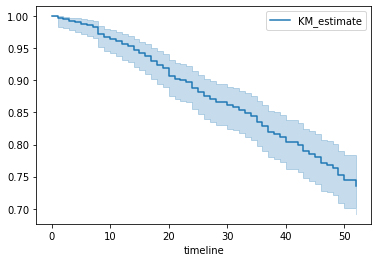

In [37]:
kmf.plot_survival_function()
plt.show()

In [40]:
kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
1.0,0.002315
2.0,0.004630
3.0,0.006944
4.0,0.009259
5.0,0.011574
6.0,0.013889
7.0,0.016204
8.0,0.027778


14% is the probability that an ex-convict is re-arrested within 30 weeks.

## 0.1.10 Long live democracy!

In [43]:
regime_durations.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


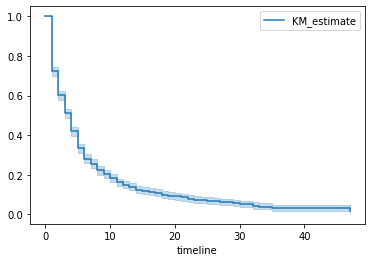

In [47]:
kmf = lifelines.KaplanMeierFitter()
kmf.fit(durations=regime_durations['duration'], 
        event_observed=regime_durations['observed'])
# Visualize and show the survival curve
kmf.plot_survival_function()
plt.show()

In [55]:
print('{} is the approximate median duration from all the regimes. Approximately 50% of regimes last shorter than 4 years, and the other regimes last 4 years or longer.'.format(kmf.median_survival_time_))

4.0 is the approximate median duration from all the regimes. Approximately 50% of regimes last shorter than 4 years, and the other regimes last 4 years or longer.


In [56]:
print('ok_')

ok_
